Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Epoch 1/20
314/314 [==============================] - 54s 152ms/step - loss: 2.9522 - accuracy: 0.1238 - val_loss: 2.3651 - val_accuracy: 0.1428
Epoch 2/20
314/314 [==============================] - 49s 153ms/step - loss: 2.1391 - accuracy: 0.2064 - val_loss: 2.0871 - val_accuracy: 0.2424
Epoch 3/20
314/314 [==============================] - 47s 149ms/step - loss: 2.0107 - accuracy: 0.2763 - val_loss: 1.7772 - val_accuracy: 0.3812
Epoch 4/20
314/314 [==============================] - 47s 149ms/step - loss: 1.8575 - accuracy: 0.3516 - val_loss: 1.5173 - val_accuracy: 0.4752
Epoch 5/20
314/314 [==============================] - 49s 154ms/step - loss: 1.7127 - accuracy: 0.4123 - val_loss: 1.3347 - val_accuracy: 0.5672
Epoch 6/20
314/314 [==============================] - 48s 151ms/step - loss: 1.5390 - accuracy: 0.4740 - val_loss: 1.2803 - val_accuracy: 0.5724
Epoc

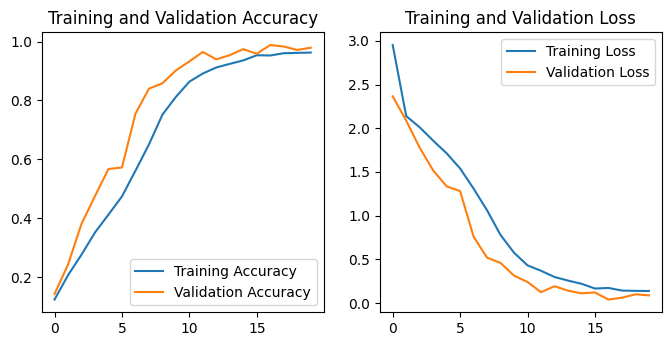

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  8 17:47:13 2023

@author: kmark7
"""

import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

EPOCH = 20

# Load the dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    "10_food_classes_all_data/train/",
    image_size=(224, 224),
    batch_size=32,
)
val_ds = keras.preprocessing.image_dataset_from_directory(
    "10_food_classes_all_data/test/",
    image_size=(224, 224),
    batch_size=32,
)

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
        rescale=1/255.,
        rotation_range=40, # kép forgatása max 20 fokkal
        shear_range=0.3, # nyírás
        zoom_range=0.1, # nagyítás
        width_shift_range=0.2, # kép eltolása
        height_shift_range=0.2, # kép eltolása
        horizontal_flip=True # vízszintes tengely menti tükrözés
    )

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

augmented_train_ds = keras.preprocessing.image_dataset_from_directory(
    "10_food_classes_all_data/test/",
    image_size=(224, 224),
    batch_size=32,
)


# Preprocess the data
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)


# Korai megállás beállítása
early_stopping = EarlyStopping(
    min_delta=0.01,
    patience=3,
    restore_best_weights=True,
)

# Define the model architecture
model = keras.Sequential(
    [
        layers.Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(1024, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1024, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Combine the datasets
combined_train_ds = train_ds.concatenate(augmented_train_ds)

# Train the model
history = model.fit(
    combined_train_ds,
    epochs=EPOCH,
    validation_data=val_ds,
    callbacks=[early_stopping]
  )

# Evaluate the model
test_ds = keras.preprocessing.image_dataset_from_directory(
    "10_food_classes_all_data/test/",
    image_size=(224, 224),
    batch_size=256,
    shuffle=True
)
test_ds = test_ds.prefetch(buffer_size=32)
# Save te model
model.save("saved_trained_DL5_Homework_model")
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print("Test accuracy:", test_acc)

# Plot the training and validation accuracy and loss
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCH)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()